# Boston Data Set

## Overview
### Each of the 506 rows in the dataset describes a Boston suburb or town, and it has 14 columns with information such as average number of rooms per dwelling, pupil-teacher ratio, and per capita crime rate.

#### No of instances: 506

####  No. of Attributes: 13 Numeric/categorical predictive. Median value(usually attribute 14) is usually the target.

### Attribute Information (In Order): Dict

In [40]:
# Attribute Information (In Order): Dict
boston_columns = {
    "CRIM": "Per capita crime rate by town",
    "ZN": "Proportion of residential land zoned for plots over 25,000 sq.ft.",
    "INDUS": "Proportion of non-retail business acres per town",
    "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX": "Nitric oxides concentration (parts per 10 million)",
    "RM": "Average number of rooms per dwelling",
    "AGE": "Proportion of owner-occupied units built prior to 1940",
    "DIS": "Weighted distances to five Boston employment centers",
    "RAD": "Index of accessibility to radial highways",
    "TAX": "Full-value property-tax rate per $10,000",
    "PTRATIO": "Pupil-teacher ratio by town",
    "B": "1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town",
    "LSTAT": "Percentage of lower status of the population",
    "MEDV": "Median value of owner-occupied homes in $1000s (target variable)"
}

In [41]:
for key in boston_columns:
    print(key, boston_columns[key]) 

CRIM Per capita crime rate by town
ZN Proportion of residential land zoned for plots over 25,000 sq.ft.
INDUS Proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX Nitric oxides concentration (parts per 10 million)
RM Average number of rooms per dwelling
AGE Proportion of owner-occupied units built prior to 1940
DIS Weighted distances to five Boston employment centers
RAD Index of accessibility to radial highways
TAX Full-value property-tax rate per $10,000
PTRATIO Pupil-teacher ratio by town
B 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town
LSTAT Percentage of lower status of the population
MEDV Median value of owner-occupied homes in $1000s (target variable)


## Why Boston Dataset is so ubiquitous ?

The data comprised in this dataset was collected by the U.S Census Service, and it first appeared in the history of statistical analysis in a paper by David Harrison Jr. and Daniel L. Rubinfeld, called Hedonic housing prices and the demand for clean air[1]. Researchers had a hypothesis that people were willing to pay more for clean air —hence the term “hedonic pricing” which in this case is used to describe the monetary value that people assign to factors not inherent to the property but to its surrounding area— but there was debate on how to measure it. Harrison and Rubinfeld were concerned:

While several studies have used [the housing market approach] to estimate the demand for air quality improvements, they have paid little attention to the sensitivity of the results to the assumptions embedded in the procedures.


### Some problems with the original dataset and how to fix them

#### The language
First of all, a sociological consideration. When we go to the canonical description of the dataset, under column 'B' it says: '1000(Bk — 0.63)² where Bk is the proportion of blacks(sic) by town'. This language is outdated and might be offensive, so please avoid it when describing this dataset. "African-Americans" or "black people" are more acceptable terms.

In [1]:
import numpy as np   # Some basic libraries
import pandas as pd
import matplotlib.pyplot as plt  #A visualization library
from sklearn.neural_network import MLPRegressor  #Importing MLP from sklearn
from math import sqrt                      #Some libraries for error calculation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split  #Split the data set
from sklearn import preprocessing  #preprocessing library

In [18]:
#columns name 
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
column_names_tup = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')
#Data load from csv file
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names_tup)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Censored data
As for the quality of the data, the dataset is pretty robust but not perfect. When you do a scatter plot of the data, you quickly notice that prices of homes seem to be capped at 50. This is because the Census Service censored the data. Censoring data means restricting the range of possible values of a variable. In this case, they decided to set the maximum value of the price variable to 50k USD, so no price can go beyond that value.

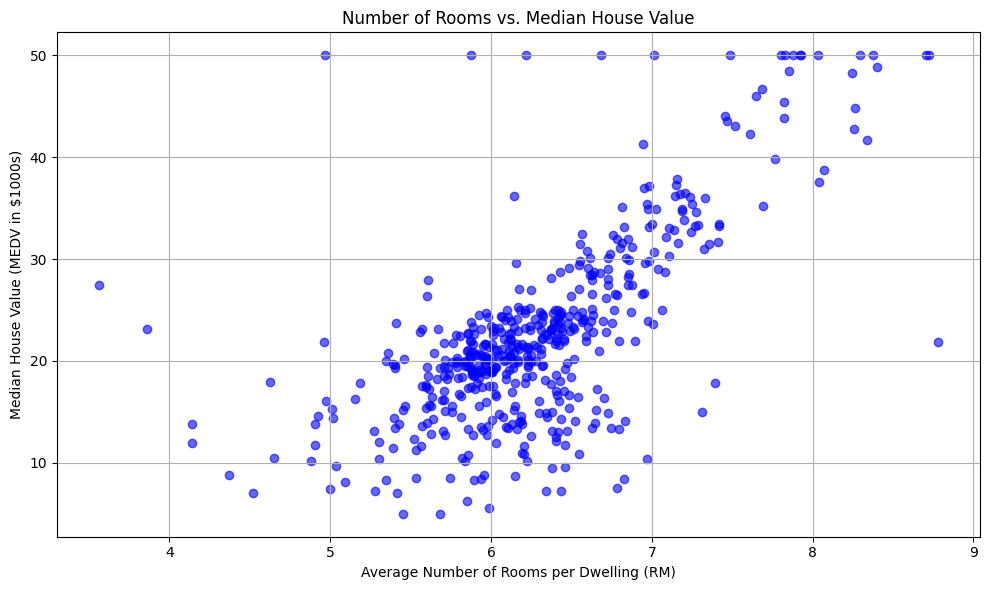

In [29]:
# Plot RM vs MEDV
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.6, color='blue')
plt.title('Number of Rooms vs. Median House Value')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median House Value (MEDV in $1000s)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### That’s why, when you visualize the data, you see a sort of ceiling that flattens your datapoints at 50. In reality, these prices were probably higher.

In [30]:
print('Name of columns', df.columns,'\nShape of data', np.shape(df))

Name of columns Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object') 
Shape of data (506, 14)


## A Brief Statistical Analysis

In [42]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Select all columns (except MEDV) as input features set X

In [43]:
X = df.drop(['MEDV'], axis=1)
print('Shape of input feature:',X.shape)
#Preprocessing is done
X = preprocessing.scale(X)

Shape of input feature: (506, 13)


In [47]:
# If this below command isnt run, the python code Y.shape will throw the following permission error:OperationalError: attempt to write a readonly database

import os
os.environ["PYTHONHISTORY"] = "/tmp/fake_history"

### Select the target variable as Y

In [48]:
Y=df['MEDV']
print('Shape of target:', Y.shape)

Shape of target: (506,)


FYI...
Shape of target: (506,)
This is not an error, just an info message telling you that your target (i.e., y, the house prices) is a 1D array with 506 samples:

In [50]:
#The actual data is splited into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#### MLPRegressor
It's a feedforward neural network model for regression tasks (predicting continuous values).

In [51]:
#The MLP algorithm with some hyperparameters
model = MLPRegressor(hidden_layer_sizes=[20,20],activation='relu',alpha=1.0,
                   learning_rate ='constant', max_iter=10000,random_state=42)
#Model is trained on training dataset
model.fit(X_train,y_train)

MLPRegressor(alpha=1.0, hidden_layer_sizes=[20, 20], max_iter=10000,
             random_state=42)

In [52]:
#Predictions are done on input test and train
y_predtest = model.predict(X_test)
y_predtrain = model.predict(X_train)

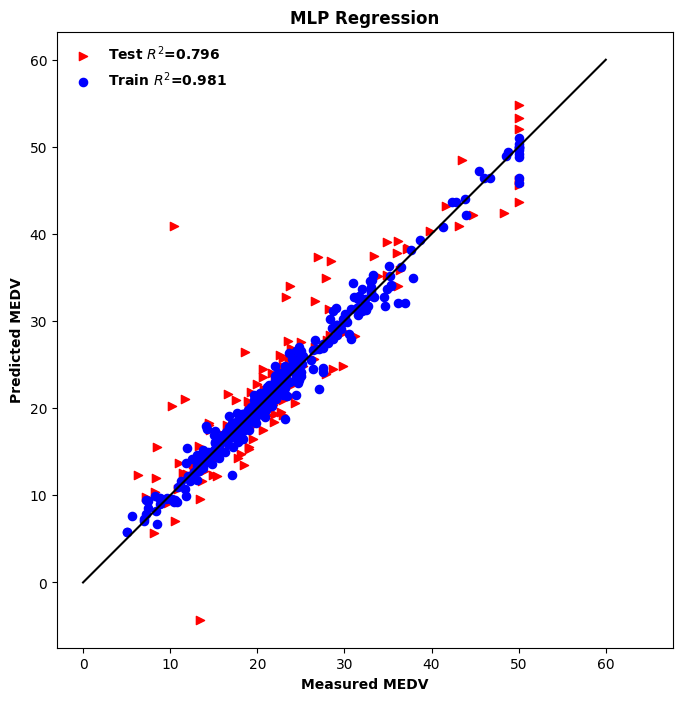

In [53]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [54]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 1.555330264177448
mean_absolute_error: 0.8859098938658655
root mean squared error: 1.2471288081739784
MPAE: 4.554623914166757

R2 value_train: 0.9808431061776824

parameter for testing
mean_squared_error: 18.71975121467892
mean_absolute_error: 2.6913276793627037
root mean squared error: 4.326632780197428
MPAE: 15.23699693095837

R2 value_test: 0.7957573949010602


**Nerual network by using keras framework**

In [55]:
#Import some crucial tools from tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential

In [56]:
#The weight initiatization is fixed
import random
random.seed(11)

In [57]:
#A custom metric r_square is defined
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [60]:
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=13, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])
    #adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    #model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=adam, metrics = [r_square])
    return model
#Model is called here
model=create_model()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_split = 0.2) # Data for evaluation

Epoch 1/100


AttributeError: module 'keras.backend' has no attribute 'sum'

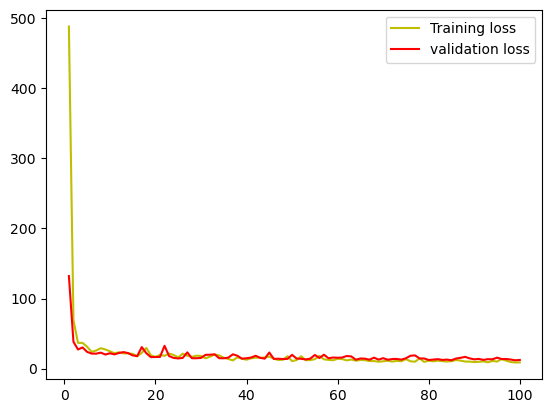

In [33]:
#Loss v/s epochs plot
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend( loc ='best')
plt.show()

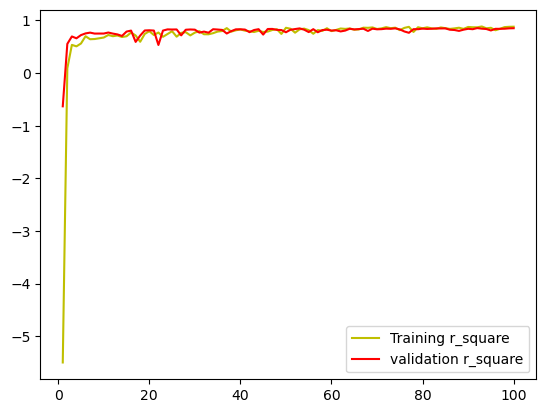

In [34]:
#R_square v/s epochs plot
r_square = model.history['r_square']
val_r_square = model.history['val_r_square']
epochs = range(1,len(loss)+1)
plt.plot(epochs, r_square, 'y', label='Training r_square')
plt.plot(epochs, val_r_square, 'r', label='validation r_square')
plt.legend(loc ='best')
plt.show()

In [35]:
#Predictions on input test and train
y_predtest = model.model.predict(X_test)
y_predtrain = model.model.predict(X_train)

12/12 [==============================] - 0s 645us/step


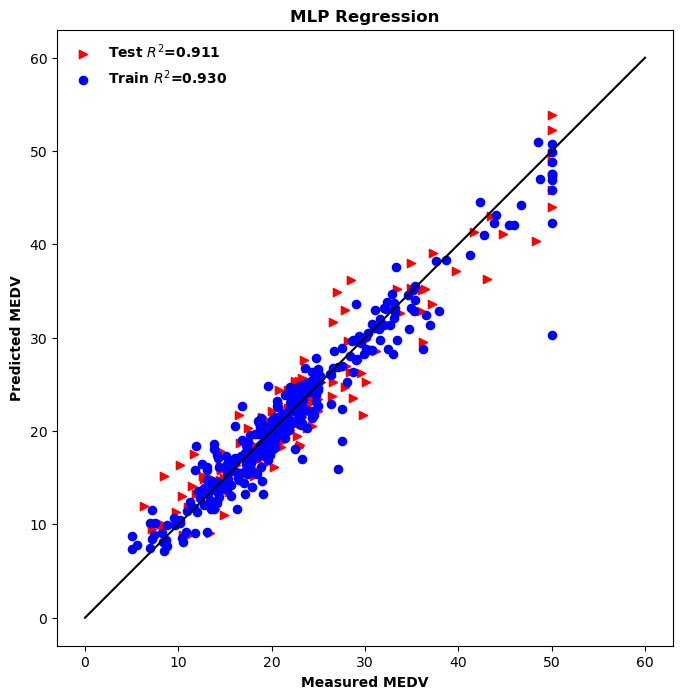

In [40]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('NN.pdf', dpi=5000)   # Save the plot in pdf
plt.show()

In [42]:
#Conversion of array to list
def ndarray_series(y_predtest):
    list1 = []
    for i in y_predtest:
        list1.append(i[0])
    return list1

In [44]:
y_predtrain =  ndarray_series(y_predtrain)
y_predtest =  ndarray_series(y_predtest)

In [46]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 5.700732192234939
mean_absolute_error: 1.6149619913370594
root mean squared error: 2.387620613128254
MPAE: 8.309083616084186

R2 value_train: 0.9297844812568676

parameter for testing
mean_squared_error: 8.130841583033623
mean_absolute_error: 2.1991116134743947
root mean squared error: 2.851463060085756
MPAE: 11.26036170460036

R2 value_test: 0.9112881230353436
